Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [ ]:
## dataset credits :Kaggle

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
571,7025-WCBNE,Male,1,No,No,47,Yes,Yes,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),59.60,2754,No
4151,7733-UDMTP,Female,1,No,No,57,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,55.00,3094.05,No
2978,2960-NKRSO,Male,0,No,No,24,Yes,No,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,85.95,2107.15,No
4407,1850-AKQEP,Male,0,No,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,178.7,No
3149,3629-WEAAM,Female,0,No,No,8,Yes,No,DSL,No,...,Yes,Yes,No,Yes,Month-to-month,No,Mailed check,64.10,504.05,No


In [3]:
## drop id as it has no val

df.drop('customerID',axis='columns',inplace=True)

In [10]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

lets convert all objects to int/float

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
df.TotalCharges.values           ##although it looks like float , it's obj,let's convert 

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [14]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

Hmmm... some values seems to be not numbers but blank string. Let's find out such rows

In [18]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull() ##handle error

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [16]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [19]:
df.shape

(7043, 20)

In [20]:
df.iloc[488]   ##intloc

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [21]:
df.iloc[488].TotalCharges

' '

In [22]:
df[df.TotalCharges!=' '].shape ## drop null

(7032, 20)

In [23]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [25]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges) ## convert to num

C:\Users\richardgr\AppData\Local\Temp\ipykernel_3548\4002680242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges) ## convert to num


In [26]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [27]:
df1[df1.Churn=='No']    ##peeps sticking with company

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


Data Visualization

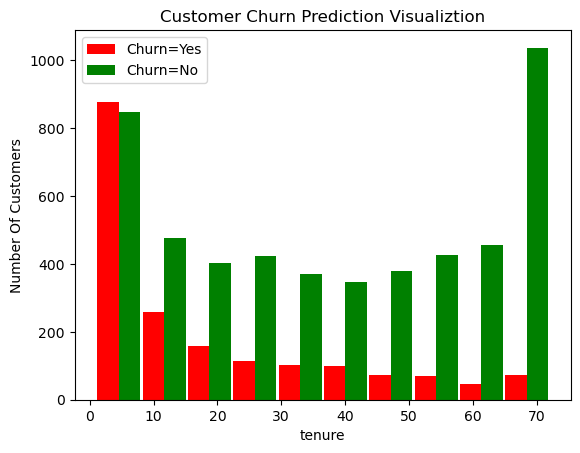

In [31]:
tenure_churn_no = df1[df1.Churn=='No'].tenure           ##months
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

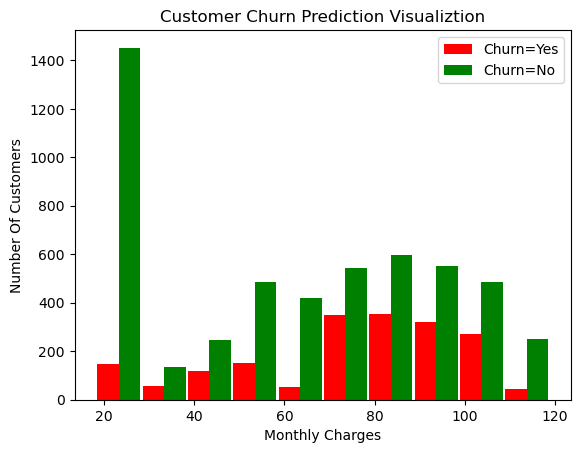

In [32]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")



plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [53]:
for i in df:
    print(i)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [37]:
for i in df:
    ##print(df[i].unique()) ##without col name
    print(f'{i}: {df[i].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [40]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [38]:
## cut off redundant val
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\richardgr\AppData\Local\Temp\ipykernel_3548\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\richardgr\AppData\Local\Temp\ipykernel_3548\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [41]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Convert categorical val to 0 & 1

In [42]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\richardgr\AppData\Local\Temp\ipykernel_3548\1648037665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [47]:
print_unique_col_values(df1)      ## obj leftover

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [45]:
df1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1


In [46]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [49]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)
df1.gender.unique()

C:\Users\richardgr\AppData\Local\Temp\ipykernel_3548\2321097074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


array([1, 0], dtype=int64)

## one hot encoding

In [50]:
## for value cap more than 0,1

df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [51]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1081,0,1,1,0,46,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3869,0,0,1,0,50,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
6330,1,0,1,0,23,1,1,0,0,1,...,0,1,0,1,0,0,0,0,0,1
3487,1,0,1,1,52,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4004,0,0,1,0,72,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0


In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [54]:
df2.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [55]:
## Normalization, attributes to scrutiny 
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [56]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

Train test split

In [57]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [58]:
X_train.shape

(5625, 26)

In [59]:
X_test.shape

(1407, 26)

In [60]:
X_train[:10] ##upto 10 rows

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [61]:
len(X_train.columns)

26

#### Build a model (ANN) in tensorflow/keras

In [62]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),   ## you can have neurons as equal to columns
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',      ##batch gradient descent
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 0.4879 - accuracy: 0.7660
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.7954
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8020
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8055
Epoch 5/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8055
Epoch 6/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4095 - accuracy: 0.8087
Epoch 7/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4098 - accuracy: 0.8073
Epoch 8/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4074 - accuracy: 0.8116
Epoch 9/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4060 - accuracy: 0.8080
Epoch 10/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4054 - accuracy: 0.8108

In [63]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.7783


[0.4577327072620392, 0.778251588344574]

In [64]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.374873  ],
       [0.5379749 ],
       [0.02203338],
       [0.8839854 ],
       [0.51125973]], dtype=float32)

In [72]:
y_pred = []                 ##reverting back before normalization
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [73]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 0, 0, 0]

In [69]:
y_test[:10]          ##actual Y 

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [74]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       999
           1       0.61      0.63      0.62       408

    accuracy                           0.78      1407
   macro avg       0.73      0.74      0.73      1407
weighted avg       0.78      0.78      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

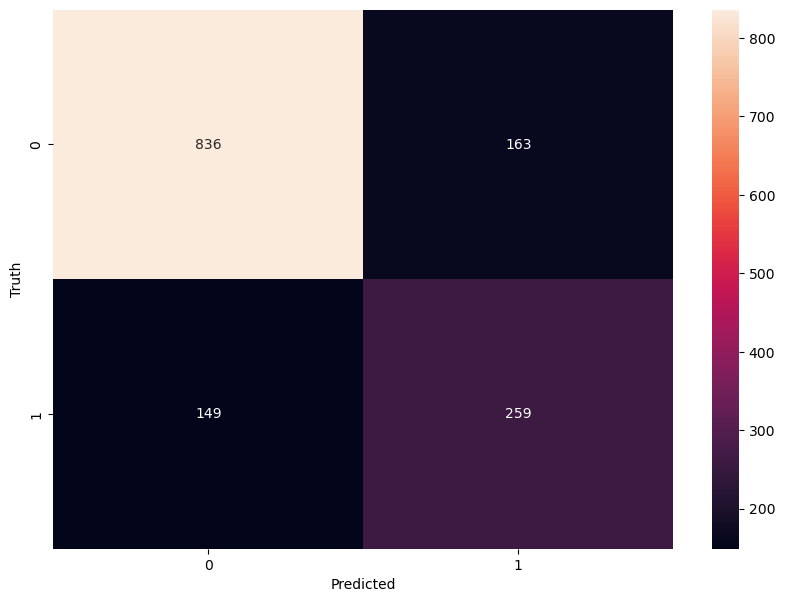

In [75]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [77]:
y_test.shape

(1407,)

In [78]:
##Accuracy
round((836+259)/(836+259+163+149),2)

0.78

In [80]:
## Precision for no churn 
round(836/(836+149),2)

0.85

In [82]:
round(259/(229+163),2) ##2 deci

0.66

In [83]:
## recall
round(836/(836+163),2)

0.84

## Here comes Handling imbalanced data 

Method 1: Undersampling  /  forthcoming techniques helps to increase f1 score of churn yes / no  by compensating vals of depend Vari values (0,1 - in our case) 

In [84]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]  ## churn val having 0 and 1
df_class_1 = df2[df2['Churn'] == 1]

In [91]:
count_class_0

5163

In [86]:
df_class_0.shape

(5163, 27)

In [88]:
df_class_1.shape

(1869, 27)

In [90]:
df_class_0.sample(count_class_1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4435,0,0,1,0,0.225352,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
6784,1,0,0,0,0.253521,1,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3670,1,0,1,1,0.450704,1,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
1430,1,0,0,0,0.309859,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
5018,1,0,1,1,1.000000,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,0,1,0,0,0.887324,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
5148,0,0,1,0,0.901408,1,1,1,1,1,...,0,1,0,0,0,1,0,0,1,0
4420,0,0,0,0,0.366197,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0
509,1,0,0,0,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [92]:
##Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [93]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [94]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

Let's see if there's any improvement in z-score

Function to apply model 

In [106]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):           ##similar to above
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [107]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1) ## alias log loss(binary_crossentropy) 

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6046 - accuracy: 0.6987
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5119 - accuracy: 0.7676
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.7699
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.7692
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.7716
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7696
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.7712
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7746
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7726
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4730 - accuracy: 0.7769
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8134
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8171
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8157
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4017 - accuracy: 0.8124
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8207
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3982 - accuracy: 0.8164
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8167
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8134
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3960 - accuracy: 0.8157
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.8201
Epoch 93/100


Check classification report above. f1-score for minority class 1 improved from 0.57 to 0.76. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

Method2: Oversampling

In [110]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)      ## duplicate itself as it has only 1869 points

df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [112]:
df_class_1_over.shape

(5163, 27)

In [113]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [114]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [115]:
##loss = keras.losses.BinaryCrossentropy()
##weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5432 - accuracy: 0.7408
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4939 - accuracy: 0.7645
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4877 - accuracy: 0.7665
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4833 - accuracy: 0.7700
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4792 - accuracy: 0.7726
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4767 - accuracy: 0.7712
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4742 - accuracy: 0.7736
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4709 - accuracy: 0.7724
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4678 - accuracy: 0.7757
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4657 - accura

259/259 [==============================] - 1s 2ms/step - loss: 0.3753 - accuracy: 0.8322
Epoch 82/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3719 - accuracy: 0.8338
Epoch 83/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3733 - accuracy: 0.8335
Epoch 84/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3732 - accuracy: 0.8298
Epoch 85/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3702 - accuracy: 0.8314
Epoch 86/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3725 - accuracy: 0.8344
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3694 - accuracy: 0.8380
Epoch 88/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3696 - accuracy: 0.8345
Epoch 89/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3681 - accuracy: 0.8369
Epoch 90/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3676 - accuracy: 

Check classification report above. f1-score for minority class 1 improved from 0.57 to 0.76. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

Method3: SMOTE       ## uses KNN to get data points

In [117]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [124]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [128]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [119]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [130]:
##X_sm.value_counts()

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [126]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [127]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5498 - accuracy: 0.7350
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7800
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4584 - accuracy: 0.7840
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4530 - accuracy: 0.7868
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.7918
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.7958
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.7965
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.7984
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.8038
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4267 - accura

259/259 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.8494
Epoch 82/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3384 - accuracy: 0.8505
Epoch 83/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8487
Epoch 84/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3401 - accuracy: 0.8507
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3387 - accuracy: 0.8500
Epoch 86/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.8505
Epoch 87/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.8499
Epoch 88/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.8502
Epoch 89/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8512
Epoch 90/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 

SMOT Oversampling increases f1 score of minority class 1 from 0.57 to 0.81 (huge improvement) Also over all accuracy improves from 0.78 to 0.80     

#### Best of all above

Method4: Use of Ensemble with undersampling

In [131]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [132]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [134]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

#### ensempling -> splitting           ##eventually take avg of it

model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)

In [135]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [136]:
df3.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [137]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [138]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [140]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6379 - accuracy: 0.6505
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5274 - accuracy: 0.7518
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4974 - accuracy: 0.7686
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.7686
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7769
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7729
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7763
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4766 - accuracy: 0.7766
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.7746
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4716 - accuracy: 0.7753
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8120
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8104
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8067
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8097
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8087
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8137
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8110
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8120
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8097
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8171
Epoch 93/100


In [141]:
## 2nd half of y'0'

X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6499 - accuracy: 0.6318
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5195 - accuracy: 0.7562
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.7635
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7669
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7732
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.7732
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4723 - accuracy: 0.7692
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4706 - accuracy: 0.7689
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4689 - accuracy: 0.7702
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.7749
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.3800 - accuracy: 0.8234
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3788 - accuracy: 0.8291
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3797 - accuracy: 0.8264
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3774 - accuracy: 0.8271
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8221
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8274
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.8284
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3755 - accuracy: 0.8264
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3743 - accuracy: 0.8274
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8258
Epoch 93/100


In [142]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6527 - accuracy: 0.6277
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7620
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.7681
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7715
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.7780
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.7776
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.7765
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7829
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.7829
Epoch 10/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4641 - accuracy: 0.7822
Epoch 11/

83/83 [==============================] - 0s 3ms/step - loss: 0.3867 - accuracy: 0.8250
Epoch 84/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8288
Epoch 85/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3836 - accuracy: 0.8323
Epoch 86/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3836 - accuracy: 0.8266
Epoch 87/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3817 - accuracy: 0.8277
Epoch 88/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.8269
Epoch 89/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.8315
Epoch 90/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8247
Epoch 91/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3765 - accuracy: 0.8307
Epoch 92/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3766 - accuracy: 0.8319
Epoch 93/100


In [143]:
len(y_pred1)

1407

In [144]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [145]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.78      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407



f1-score for minority class 1 improved to 0.62 from 0.57. The score for majority class 0 is suffering and reduced to 0.80 from 0.85 but at least there is some balance in terms of prediction accuracy across two classes